In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import math

from wordcloud import WordCloud, STOPWORDS
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

import warnings
warnings.filterwarnings('ignore')

In [90]:
crime = pd.read_csv('data/crimedata_cleaned.csv')

In [91]:
crime.head()

incident_number  offense_code  \
0      20228022672           601   
1      20225033150           504   
2      20228022553           619   
3      20228022692          2405   
4      20225031961           600   

                                      crime_type   occurred_date_time  \
0                            Burglary Of Vehicle  2022-12-01 11:30:00   
1  Burglary Of Shed/Detached Garage/Storage Unit  2022-11-07 20:00:00   
2                                 Theft Of Metal  2022-12-01 23:27:00   
3                         Doc Unreasonable Noise  2022-12-03 05:00:00   
4                                          Theft  2022-10-29 23:00:00   

  occurred_date               address  zip_code                 location_type  \
0    2022-12-01  1921 Willow Creek Dr     78741              Residence / Home   
1    2022-11-07         4113 Avenue F     78751     Parking /Drop Lot/ Garage   
2    2022-12-01          300 W 6Th St     78701  Commercial / Office Building   
3    2022-12-03    11704 N Lamar Blvd     78758              Residence / Home   
4    2022-10-29          708 E 6Th St     78701              Residence / Home   

   x_coordinate  y_coordinate  longitude   latitude  council_district  \
0       3119469      10058001 -97.727425  30.232680                 3   
1       3118205      10084145 -97.729489  30.304627                 9   
2       3113404      10071112 -97.745659  30.269110                 9   
3       3131678      10114301 -97.684531  30.386647                 7   
4       3116608      10070123 -97.735585  30.266186                 9   

      month  year      week  dayofmonth  
0  December  2022  Thursday           1  
1  November  2022    Monday           7  
2  December  2022  Thursday           1  
3  December  2022  Saturday           3  
4   October  2022  Saturday          29

In [92]:
crime.shape

(2287541, 17)

Since, we are still in 2023, let's omit 2023 for now.

In [ ]:
crime.groupby()

In [23]:
crime.occurred_date = pd.to_datetime(crime.occurred_date) 

In [27]:
crime1 = crime[crime.occurred_date<'01/01/2023']

In [28]:
crime1.shape

(2260034, 17)

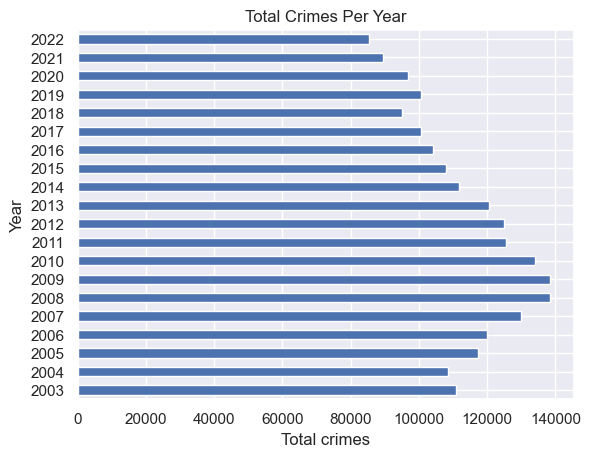

In [75]:
x = crime1.groupby('year').size().plot(kind='barh')
# x = sns.barplot(y=nm.Year, x=nm['Highest Offense Description'], orient='h')
x.set(ylabel="Year", xlabel="Total crimes", title='Total Crimes Per Year')

# fig = plt.gcf()
plt.show()
# fig.set_size_inches(10,10)
# fig.savefig('Crimes per Year.png', bbox_inches='tight', dpi=200)

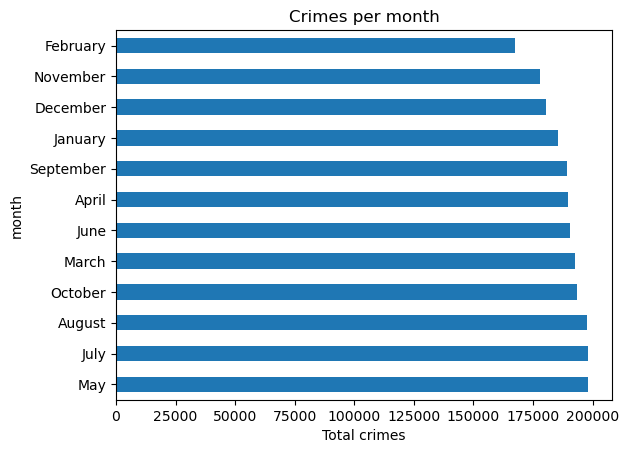

In [45]:
crime1.groupby('month').size().sort_values(ascending=False).plot(kind='barh')
plt.xlabel("Total crimes")
plt.title('Crimes per month')

fig = plt.gcf()
plt.show()
# fig.savefig('Crimes per month.png', bbox_inches='tight', dpi=200)

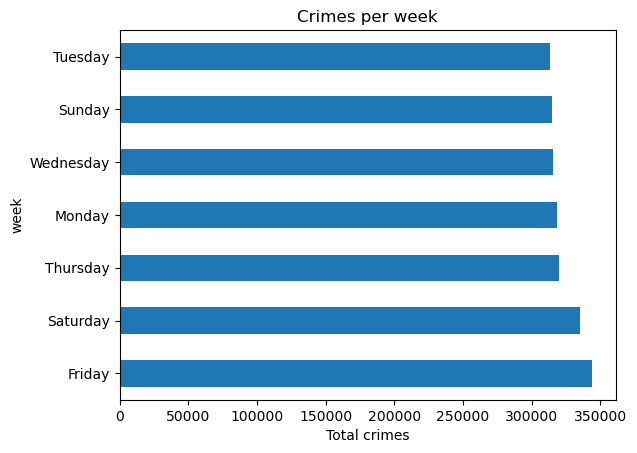

In [46]:
crime1.groupby('week').size().sort_values(ascending=False).plot(kind='barh')
plt.xlabel("Total crimes")
plt.title('Crimes per week')

fig = plt.gcf()
plt.show()
# fig.savefig('Crimes per week.png', bbox_inches='tight', dpi=200)

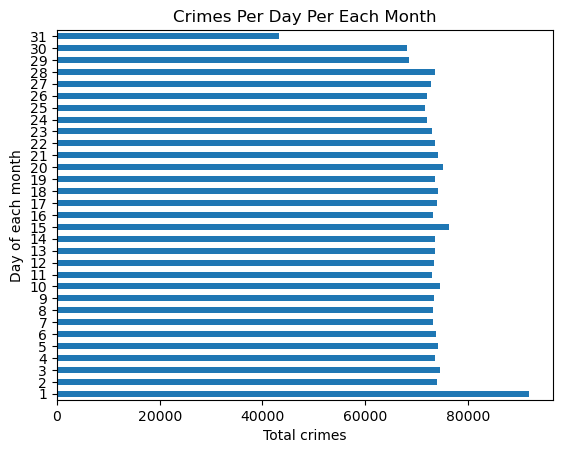

In [47]:
crime1.groupby('dayofmonth').size().sort_index().plot(kind='barh')
plt.xlabel("Total crimes")
plt.ylabel("Day of each month")
plt.title('Crimes Per Day Per Each Month')

# fig = plt.gcf()
# fig.set_size_inches(10,10)
# plt.rcParams["figure.dpi"] = 600
plt.show()
# fig.set_size_inches(12,8)
# fig.savefig('Crimes per day.png', bbox_inches='tight', dpi=200)

In Austin there are total of 10 discrict councils, let's visualize the crimes per each council district.

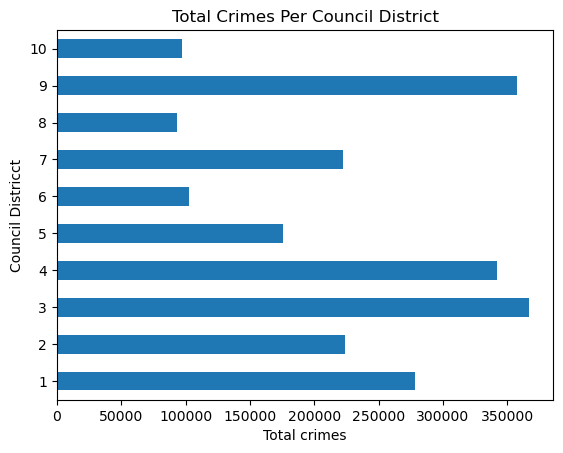

In [48]:
crime1.groupby("council_district").size().plot(kind='barh')
plt.xlabel("Total crimes")
plt.ylabel("Council Districct")
plt.title('Total Crimes Per Council District')

fig1 = plt.gcf()
plt.show()
# fig.set_size_inches(8,7)
# fig1.savefig('Total crimes per Council District.png', bbox_inches='tight', dpi=200)

It looks like districts 3,4 and 9 are famous for high number of crimes. Local authorities should pay attention to these disctricts.

<Axes: xlabel='year', ylabel='incident_number'>

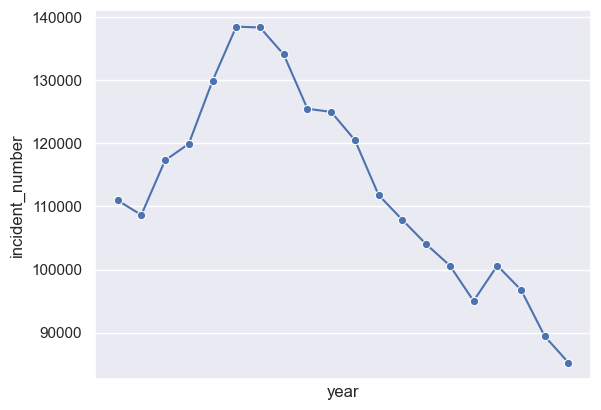

In [51]:
total_crime = crime1.groupby('year')['incident_number'].size().sort_index().reset_index()
total_crime
sns.lineplot(data=total_crime, x='year', y='incident_number', marker='o')

Let's look at the most occurred crimes.

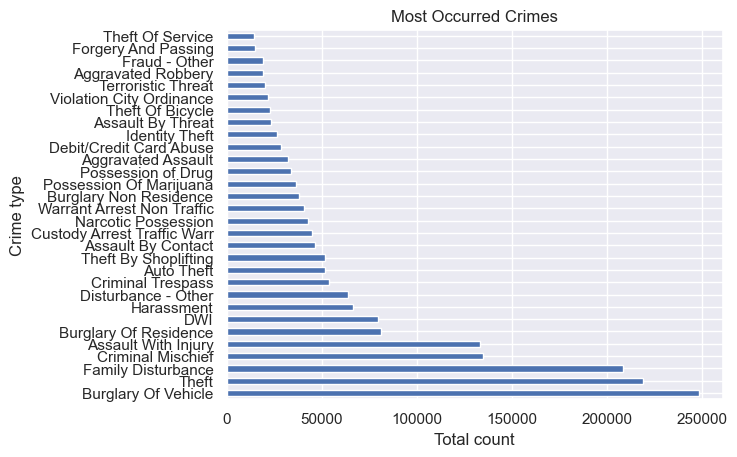

In [52]:
crime1.groupby('crime_type').size().sort_values(ascending=False)[:30].plot(kind='barh')
plt.xlabel("Total count")
plt.ylabel("Crime type")
plt.title('Most Occurred Crimes')
plt.show()

**Crimes that have high probability of causing bodily injury to the people visiting or staying in the neighborhood.**

In [95]:
filter = crime1.groupby(['crime_type']).size().reset_index().rename(columns={0:'Count'})

crime_ = filter[(filter.Count>=10000) & ~filter['crime_type'].isin(['Theft Of Bicycle', 
                                                                                    'Theft Of Service',
                                                                                    'Viol City Ordinance - Other',
                                                                                    'Warrant Arrest Non Traffic', 
                                                                                    'Theft By Shoplifting', 
                                                                                    'Dating Disturbance',
                                                                                    'Debit/Credit Card Abuse',
                                                                                    'Disturbance - Other',
                                                                                    'Family Disturbance',
                                                                                    'Forgery And Passing',
                                                                                    'Fraud - Other',
                                                                                    'Graffiti',
                                                                                    'Custody Arrest Traffic Warr',
                                                                                    'Identity Theft'])]
 
crime_

crime_type   Count
16         Aggravated Assault   32050
17         Aggravated Robbery   19010
30         Assault By Contact   46189
31          Assault By Threat   23183
36        Assault With Injury  132965
43                 Auto Theft   51500
53     Burglary Non Residence   38074
55      Burglary Of Residence   80835
57        Burglary Of Vehicle  248248
84          Criminal Mischief  134803
88          Criminal Trespass   53696
92                        DWI   79397
184                Harassment   66335
234       Narcotic Possession   42717
261   Possession Of Marijuana   36293
262        Possession of Drug   33610
299        Terroristic Threat   20281
301                     Theft  218664
308           Theft From Auto   10421
362  Violation City Ordinance   21590

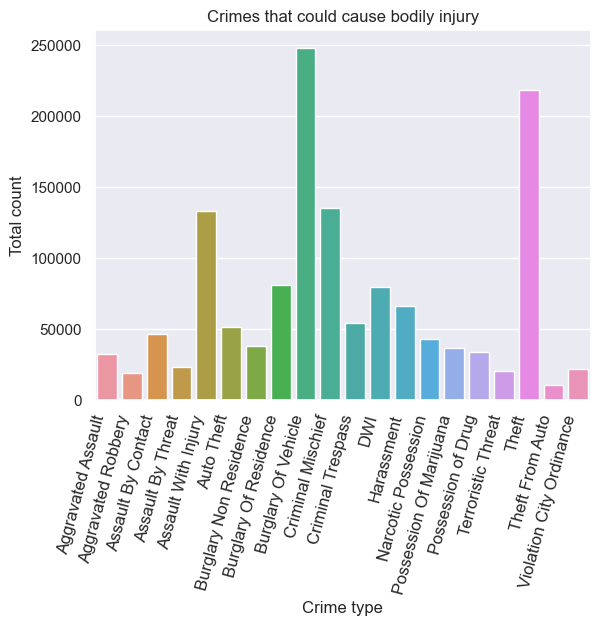

In [108]:
x = sns.barplot(data=crime_, x='crime_type', y='Count')
x.set(xlabel="Crime type", ylabel="Total count", title='Crimes that could cause bodily injury')
x.set_xticklabels(x.get_xticklabels(), rotation=75, horizontalalignment='right', fontsize='medium')
plt.show()

In [121]:
# crime1.groupby('location_type').size()

In [454]:

location = crime1.groupby('location_type').size().sort_values(ascending=False).reset_index()
loc = ['Residence / Home',
 'Other / Unknown',
 'Construction Site',
 'School - Elementary / Secondary',
 'Abandoned/Condemned Structure',
 'Cyberspace',
 'Military Installation',
 'Farm Facility',
 'Tribal Lands',
 'Dock / Wharf / Freight / Modal Terminal',
 'Industrial Site',
 'Auto Dealership New / Used',
 'Specialty Store',
 'Jail / Prison/Penitentiary/Corrections Facility',
 'Daycare Facility',
 'Shelter-Mission / Homeless',
 'School - College / University','Field / Woods','School/College']

In [455]:
location.drop(location[location['location_type'].isin(loc)].index, inplace=True)

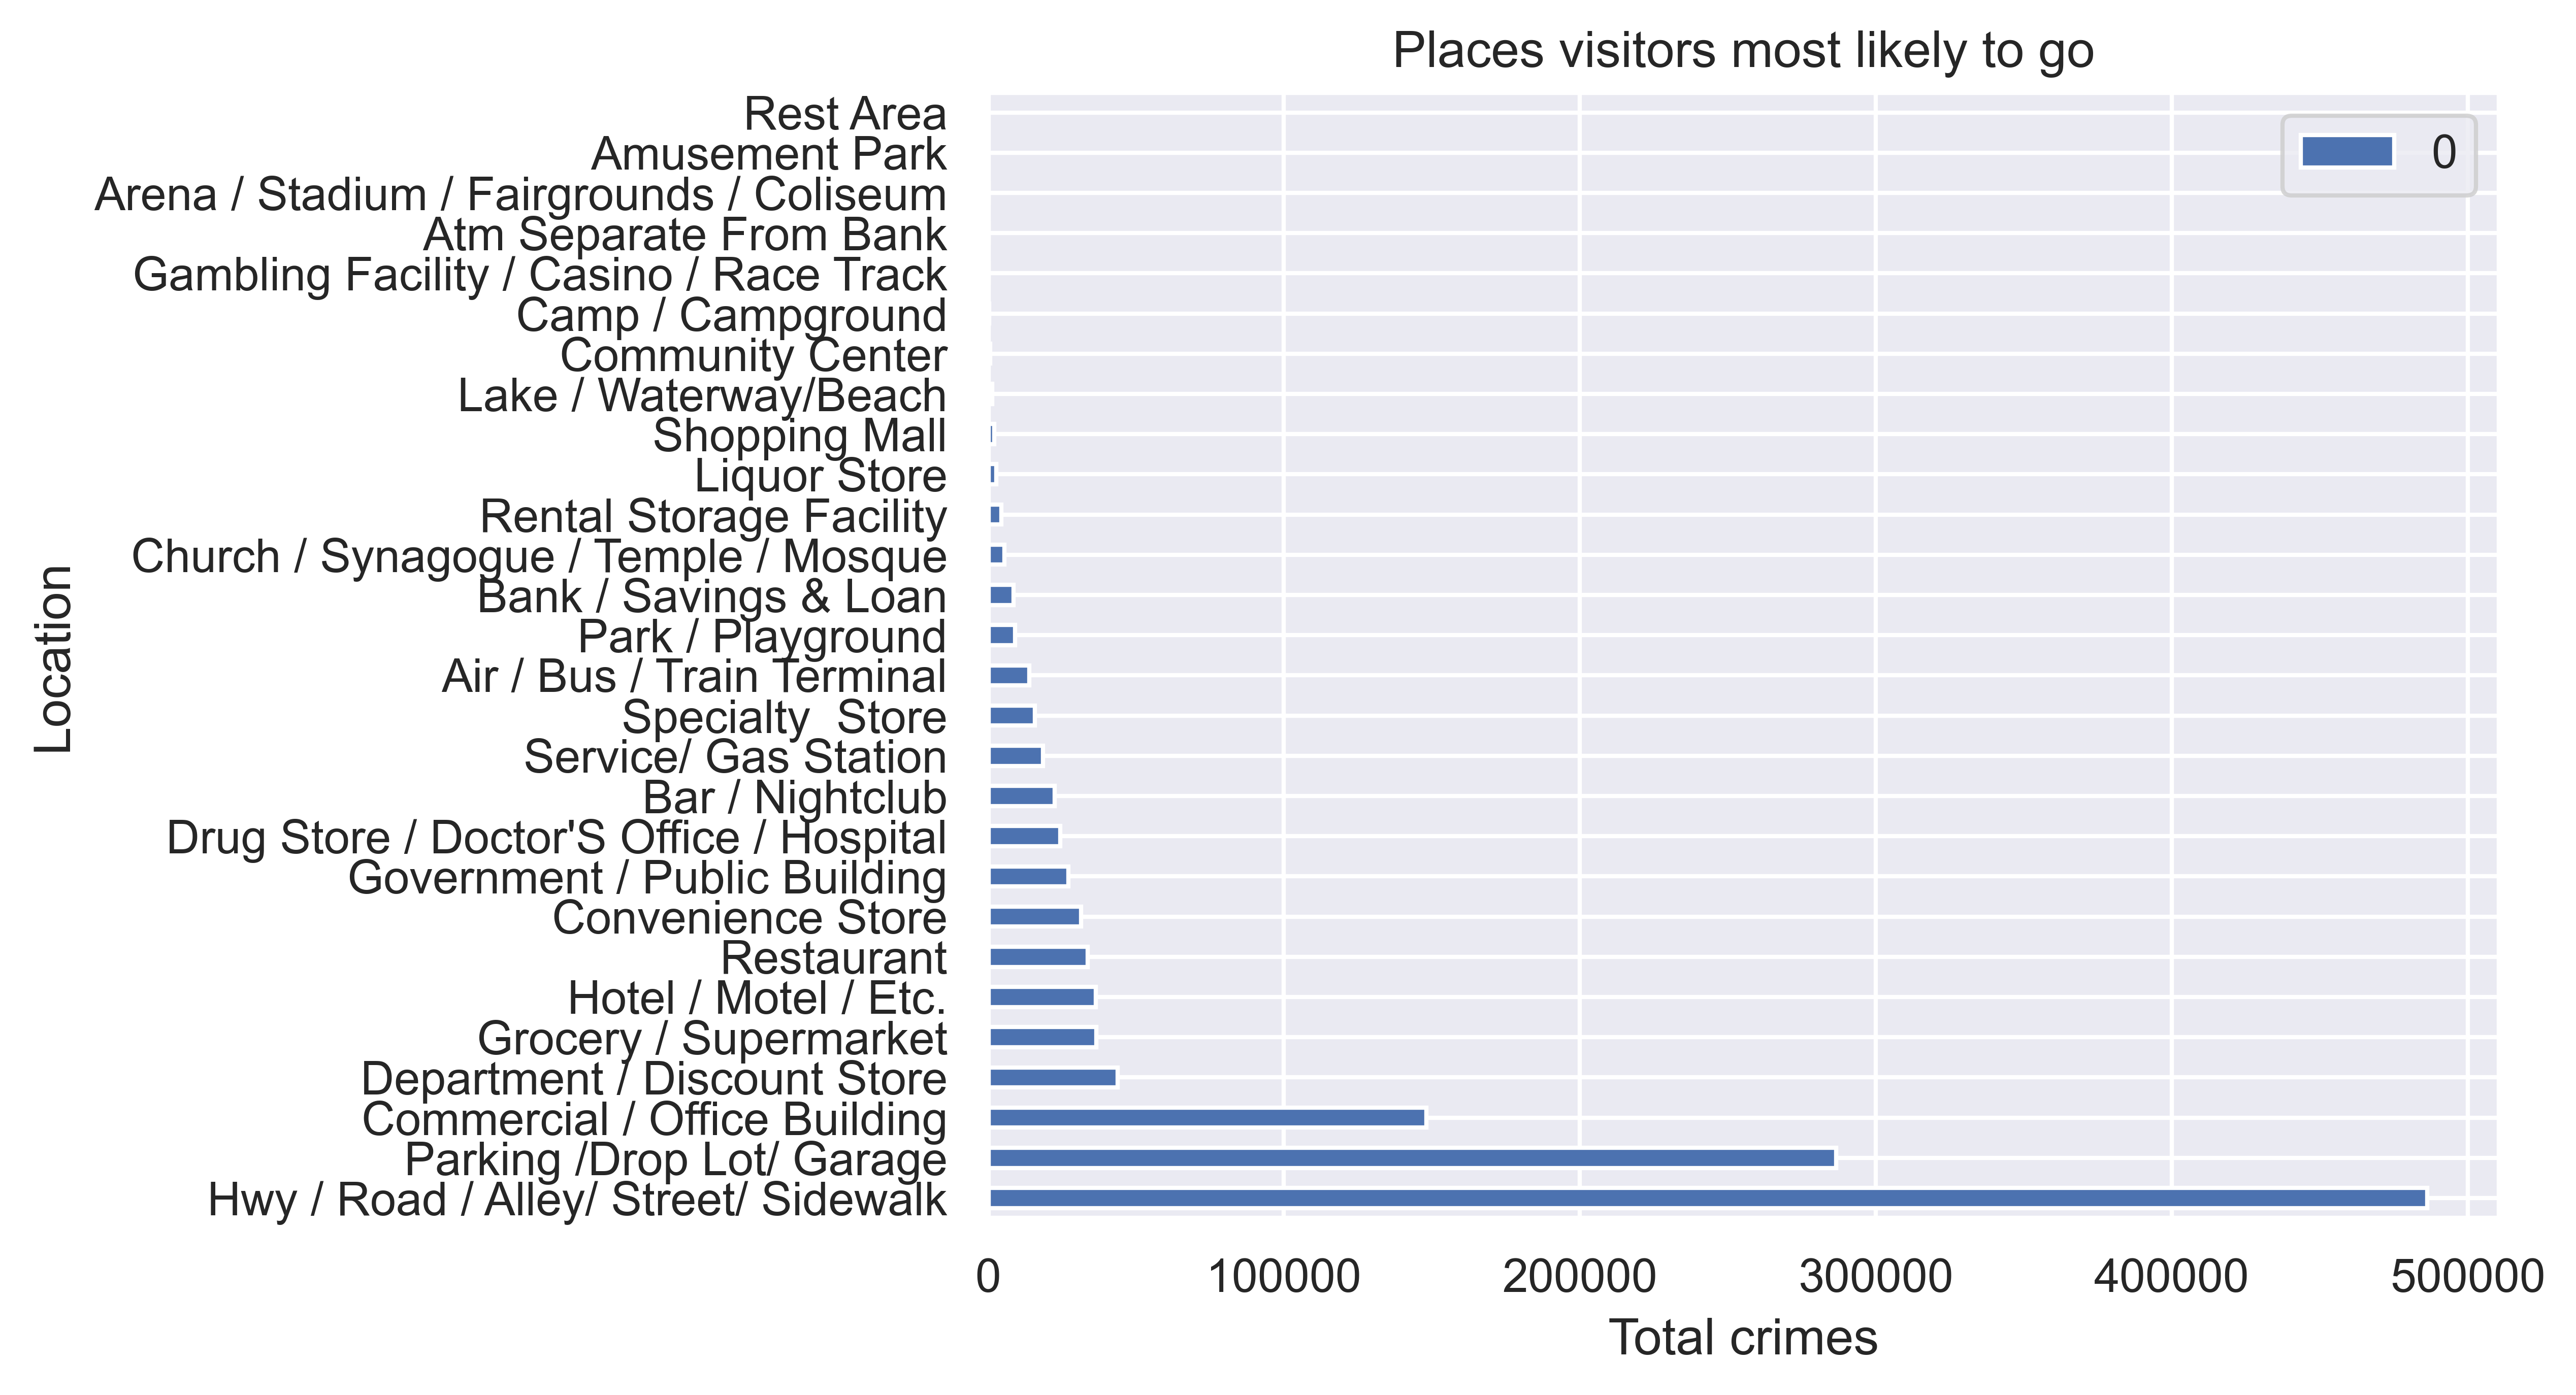

In [456]:
location.set_index('location_type').plot(kind='barh')
plt.xlabel("Total crimes")
plt.ylabel("Location")
plt.title('Places visitors most likely to go')

fig = plt.gcf()
plt.show()
# fig.set_size_inches(8,7)
# fig.savefig('Crimes by location.png', bbox_inches='tight', dpi=200)

Zip codes where the most crimes happen.

In [134]:
# x = df1.groupby(['Zip Code'])[['Highest Offense Description']].size().sort_values(by='Highest Offense Description',ascending=False).reset_index()

x = crime1.groupby('zip_code').size().sort_values(ascending=False).reset_index()

_ = sns.barplot(data=x, y=x.zip_code, x=x[0], orient='h',order=x.zip_code)
_.set(xlabel="Total count", ylabel="Zip Code", title='Total crimes at different zip codes')

fig = plt.gcf()
fig.set_size_inches(15,20)
plt.rcParams["figure.dpi"] = 600
plt.show()

We have to examine the zip code 78741 where majority of crime happened throughout the year.

In [88]:
crime1[crime1.zip_code==78741]['council_district'].value_counts().reset_index().rename(columns={'index':'Council District','council_district':'Total crimes'})

Council District  Total crimes
0                 3        194045
1                 9         10754
2                 2          2615

Looks, like majority of the crime associated with zip code 78741 occured in 3 districts, 2,3 and 9.

**Compare the crime trend in the year 2021 and 2022.**

In [ ]:
c2021 = crime1[crime1.year==2021].groupby('crime_type').agg(Y2021=('crime_type','count')).reset_index().sort_values(by='Y2021',ascending=False)
c2022 = crime1[crime1.year==2022].groupby('crime_type').agg(Y2022=('crime_type','count')).reset_index().sort_values(by='Y2022',ascending=False)

In [399]:
cc = pd.merge(c2021,c2022,on='crime_type',sort=False).set_index("crime_type")
cc

Y2021  Y2022
crime_type                              
Family Disturbance          10192   9008
Burglary Of Vehicle          9194   9909
Theft                        6094   5413
Assault With Injury          5635   5428
Criminal Mischief            5106   4635
...                           ...    ...
Unlawful Interception           1      2
Att Theft                       1      2
Att Arson                       1      1
Abuse Of Official Capacity      1      1
Domestic Violence/Alarm         1      1

[229 rows x 2 columns]

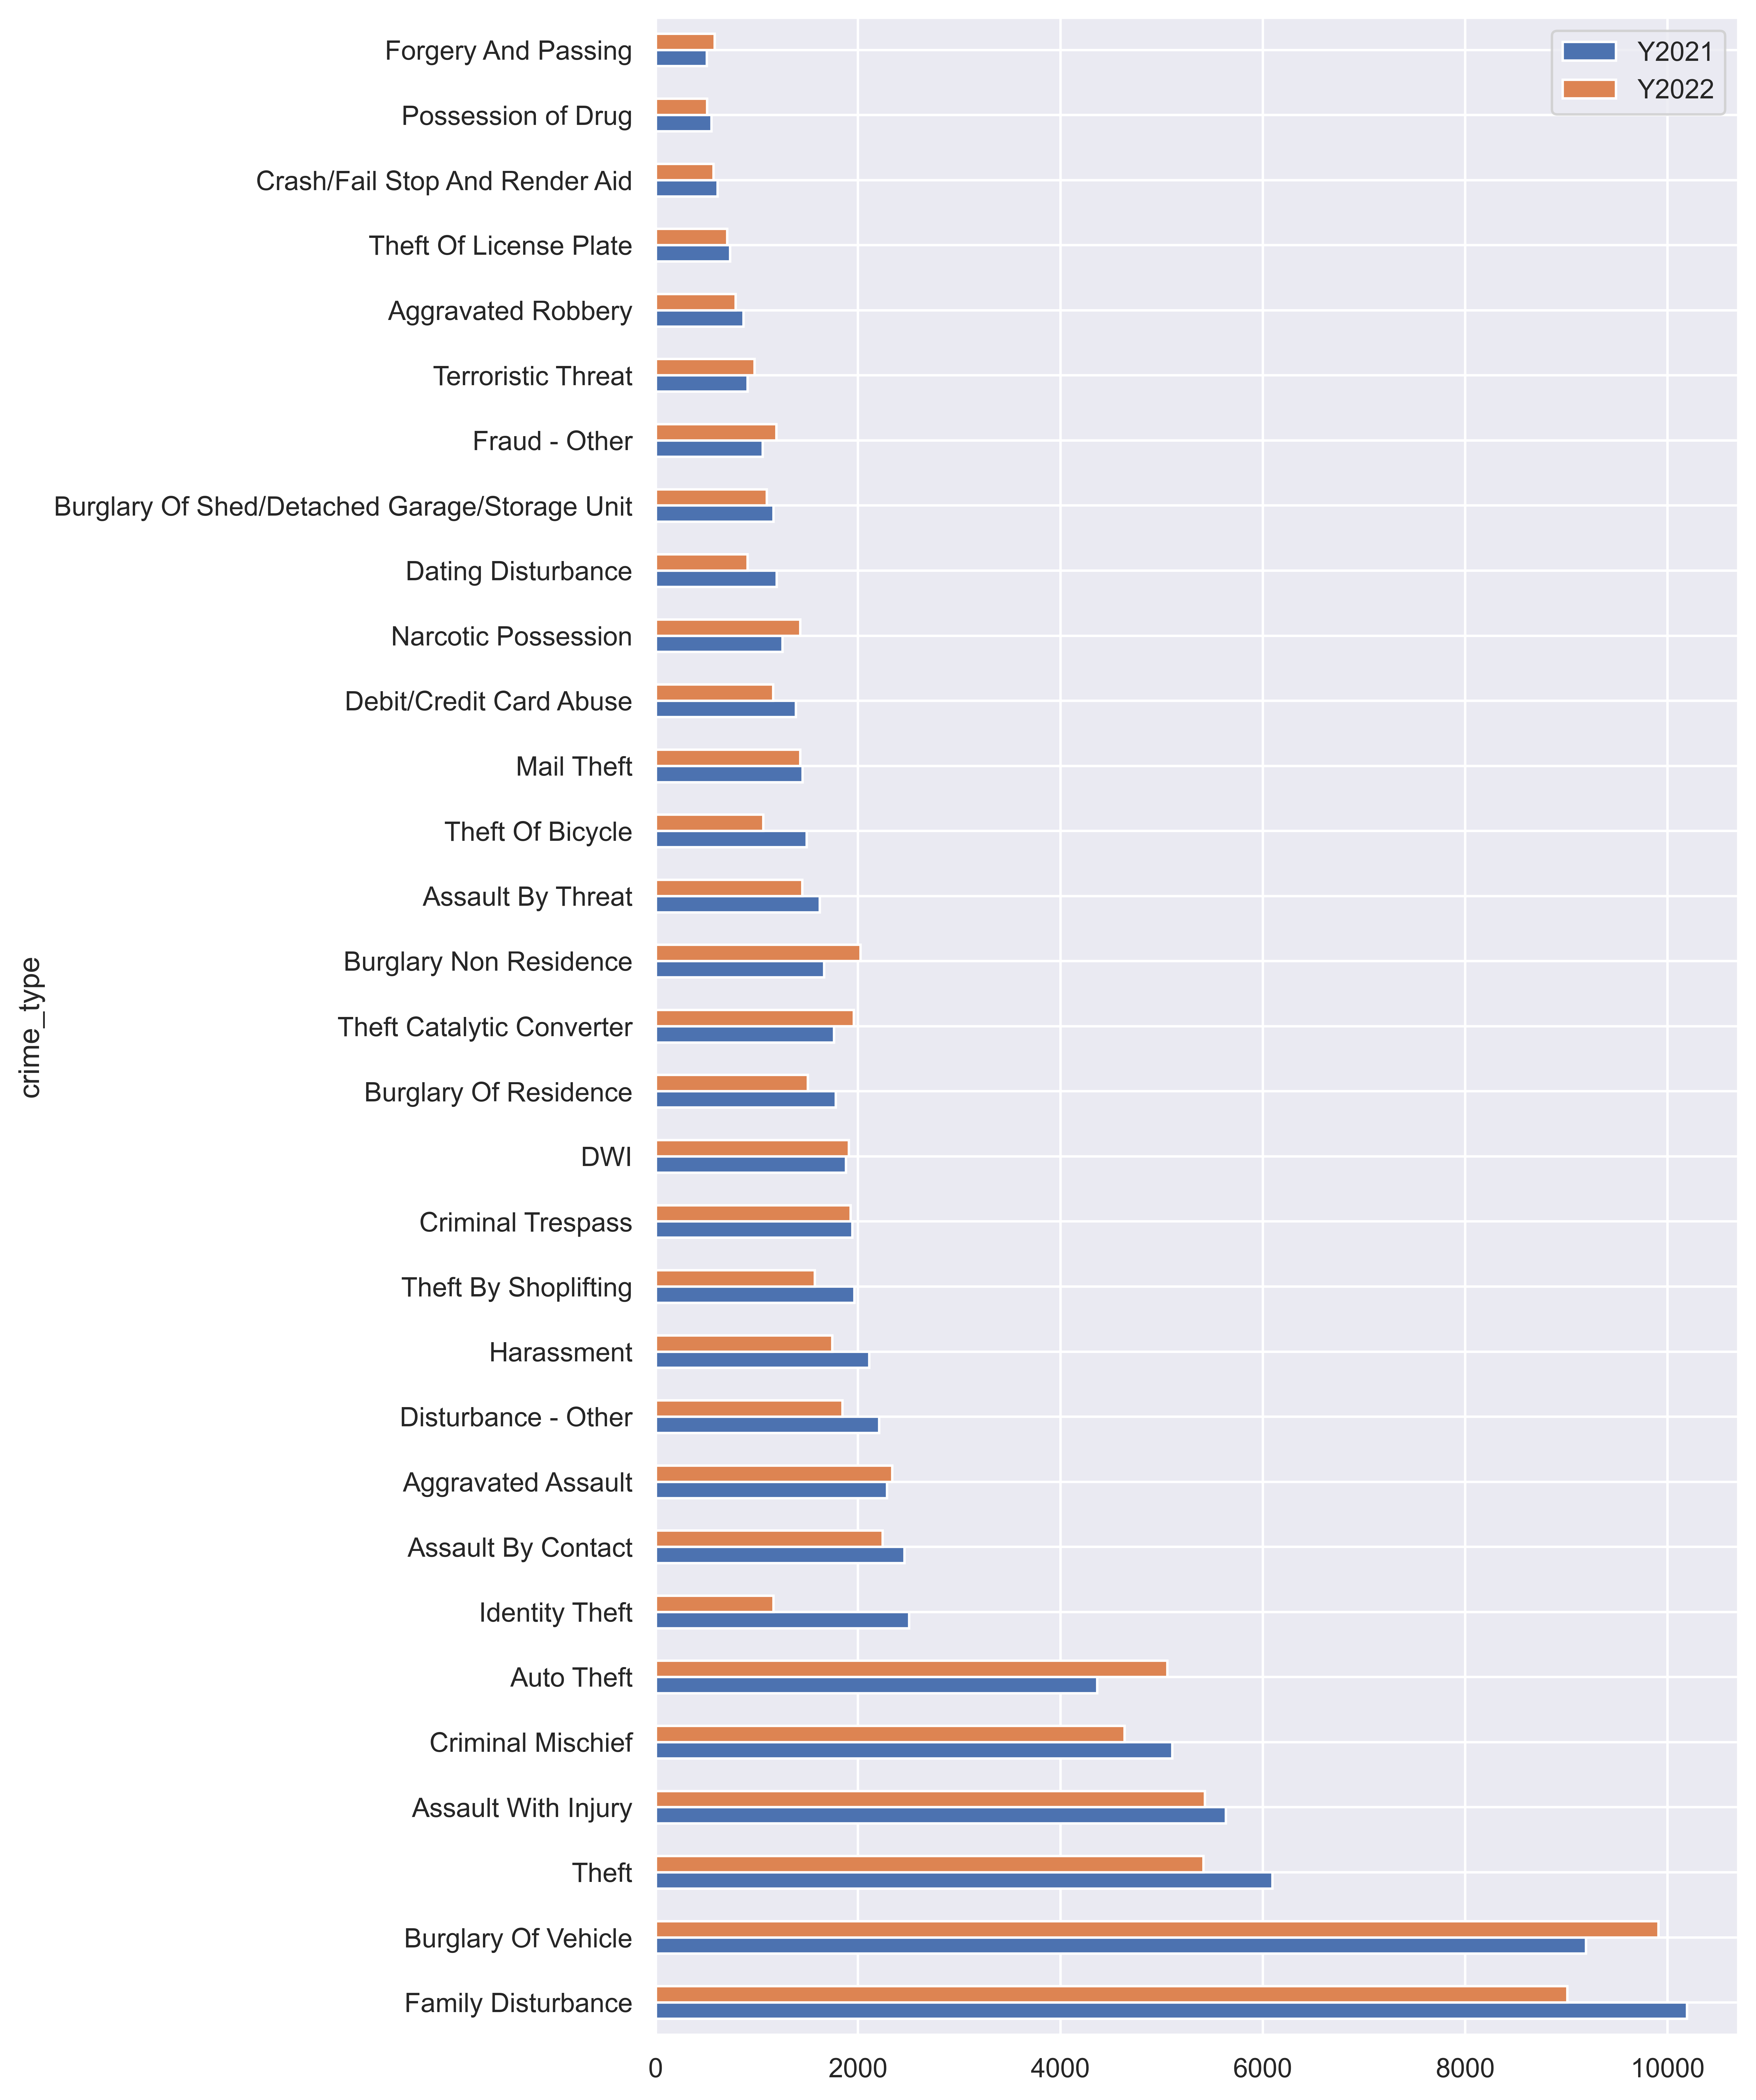

In [400]:
cc[(cc.Y2021>500) & (cc.Y2022>500)].plot(kind='barh',figsize=(8, 15))
plt.show()

Theft and burglary were the crimes that were higher than previous year.

**Time to visualize with the world cloud. Let's create a simple word cloud with the most occuring crimes.**

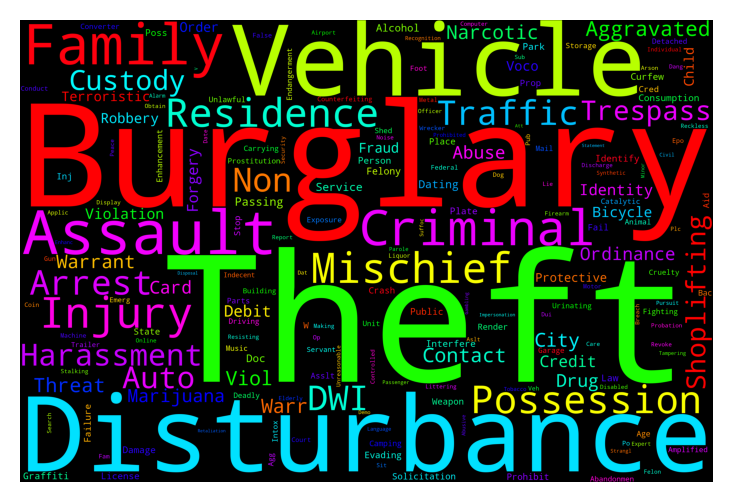

In [369]:
text= ' '.join(crime1['crime_type'].values)
word_cloud = WordCloud(
        width=3000,
        height=2000,
        random_state=1,
        background_color="black",
        colormap="gist_rainbow",
        collocations=False,
        stopwords=STOPWORDS,
#         max_words=1000,
        ).generate(text)

plt.figure(figsize=(5,3),dpi=200)
plt.imshow(word_cloud)
plt.axis("off")
fig1 = plt.gcf()
plt.show()
# fig1.savefig('word1.png',bbox_inches='tight')

In [30]:
top_crime = crime1.groupby('crime_type').size().sort_values(ascending=False)
top_crime

crime_type
Burglary Of Vehicle                            248248
Theft                                          218664
Family Disturbance                             208059
Criminal Mischief                              134803
Assault With Injury                            132965
                                                ...  
Viol City Ord-Covid 19 Mask                         1
Coercion Of Public Servant                          1
Sale Of Dxm To Minor                                1
Expired-Do Not Use-Assault On Peace Officer         1
Sleeping In Public Place                            1
Length: 368, dtype: int64

Burglary Of Vehicle was the most common crime followed by Theft. Now, let's visualize on a map the places where the top two crimes happened.

In [31]:
bov = crime1[crime1['crime_type']=='Burglary Of Vehicle'].sample(100)
t = crime1[crime1['crime_type']=='Theft'].sample(100)
selected = pd.concat([bov, t])

In [32]:
# Create a map
m_2 =  folium.Map(location=[30.266666,-97.733330], tiles='openstreetmap', zoom_start=12)

def color_producer(val):
    if val =='Burglary Of Vehicle':
        return 'green'
    elif val == 'Theft':
        return 'red'

# Add a bubble map to the base map
for i in range(0,len(selected)):
    Circle(
        location=[selected.iloc[i]['latitude'], selected.iloc[i]['longitude']],
        radius=3,
        weight=5,
        color=color_producer(selected.iloc[i]['crime_type'])).add_to(m_2),


# Display the map
style = {'fillColor': '#FFFFFF',
         'lineColor': '#00FFFFFF'}

loc = 'geojson/neighbourhoods_march16_2023.geojson'
folium.GeoJson(loc, name="geojson", style_function=lambda x: style).add_to(m_2)

m_2

In [ ]:
m_2.save("index1.html")

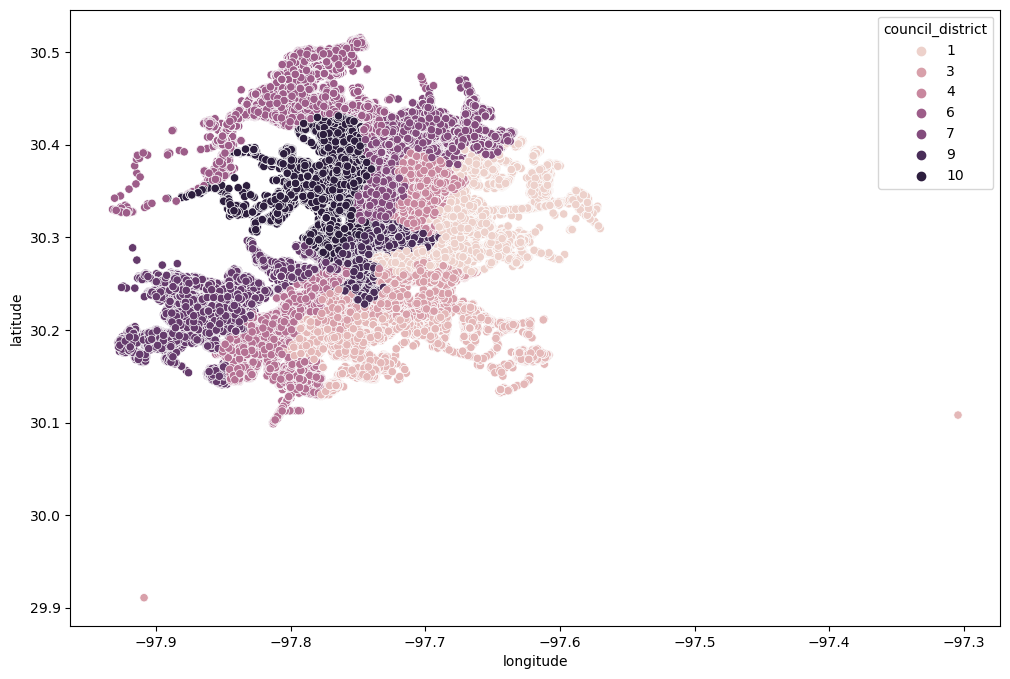

In [33]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=crime1.longitude,y=crime1.latitude,hue=crime1.council_district)
plt.show()

In [152]:
# x = crime1.groupby(['Council District','Zip Code'])[['Highest Offense Description']].count().sort_values(by=['Council District','Highest Offense Description'],ascending=[True,True])

# Airbnb

In [6]:
air = pd.read_csv('data/airbnb_cleaned.csv')

In [7]:
air.head()

id  host_id  zip_code host_neighborhood         property_type  \
0  32666944       23     78744          McKinney  Private room in home   
1  23629432       23     78744          McKinney  Private room in home   
2  39056933       23     78744          McKinney                  Tent   
3  42625339      796     78725   Austins' Colony        Entire cottage   
4  17074156     2466     78702     East Downtown     Entire guesthouse   

         room_type  price  latitude  longitude  rating  availability_365  
0     Private room     98  30.17937  -97.75119    4.77               241  
1     Private room     80  30.17879  -97.75080    4.46               265  
2  Entire home/apt     40  30.18005  -97.75093    4.94               148  
3  Entire home/apt    138  30.24147  -97.57637     NaN               125  
4  Entire home/apt    135  30.27651  -97.71234    4.68                80

In [8]:
air.fillna(0, inplace=True)

In [85]:
air.describe()

id       host_id      zip_code         price      latitude  \
count  1.394900e+04  1.394900e+04  13949.000000  13949.000000  13949.000000   
mean   2.655735e+17  1.334429e+08  78724.772887    303.983368     30.281106   
std    3.485241e+17  1.492534e+08     20.641328    720.183319      0.064847   
min    5.456000e+03  2.300000e+01  78701.000000      1.000000     30.078870   
25%    2.317176e+07  1.578249e+07  78704.000000    107.000000     30.241560   
50%    4.944146e+07  6.292611e+07  78723.000000    180.000000     30.268602   
75%    6.710568e+17  2.208430e+08  78745.000000    320.000000     30.309520   
max    8.473047e+17  5.051848e+08  78759.000000  65155.000000     30.512250   

          longitude        rating  availability_365  
count  13949.000000  13949.000000      13949.000000  
mean     -97.750495      3.809039        150.327837  
std        0.063030      1.985780        136.754490  
min      -98.056630      0.000000          0.000000  
25%      -97.770530      4.330000          0.000000  
50%      -97.740750      4.870000        123.000000  
75%      -97.716920      5.000000        298.000000  
max      -97.560620      5.000000        365.000000

Looking at the description, there's a maximum price of 65155 for one or more listings.

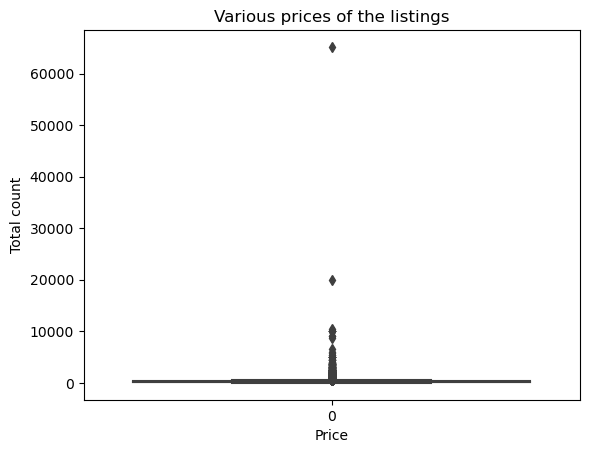

In [74]:
x = sns.boxplot(air.price)
x.set(xlabel="Price", ylabel="Total price count", title='Various prices of the listings')
plt.show()

Find out some room types that are present in Austin.

In [75]:
air.room_type.unique()

array(['Private room', 'Entire home/apt', 'Hotel room', 'Shared room'],
      dtype=object)

Strange,hotel rooms were also listed as Airbnb. Let's see how many are there.

In [77]:
filter = (air.property_type=='Room in hotel') | (air.room_type=='Hotel room') | (air.room_type=='Room in boutique hotel')
air[filter].count()

id                   31
host_id              31
zip_code             31
host_neighborhood    31
property_type        31
room_type            31
price                31
latitude             31
longitude            31
rating               31
availability_365     31
dtype: int64

We'll remove these 31 listings as they are the hotel rooms.

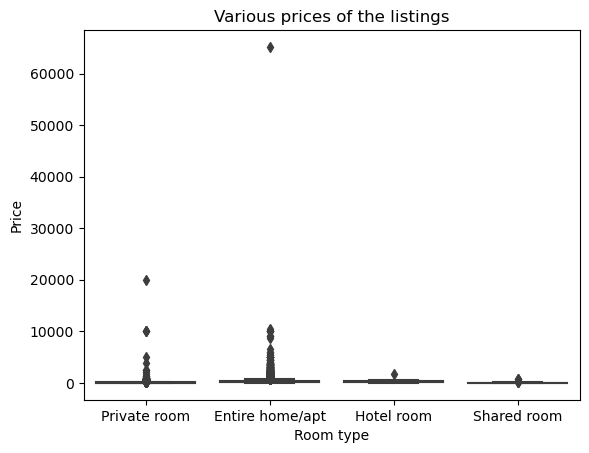

In [73]:
x = sns.boxplot(x='room_type', y='price', data=air)
x.set(xlabel="Room type", ylabel="Price", title='Various prices of the listings')
plt.show()

Form the boxplots, we can see that there are many listings whose price are above 10,000. Further calculation is need if they need to treated as outliers.

Also, Private room, and Entire home/apt should be inspected as well.

Filter out the hotel rooms.

In [81]:
air = air[~filter]
air.shape

(13949, 11)

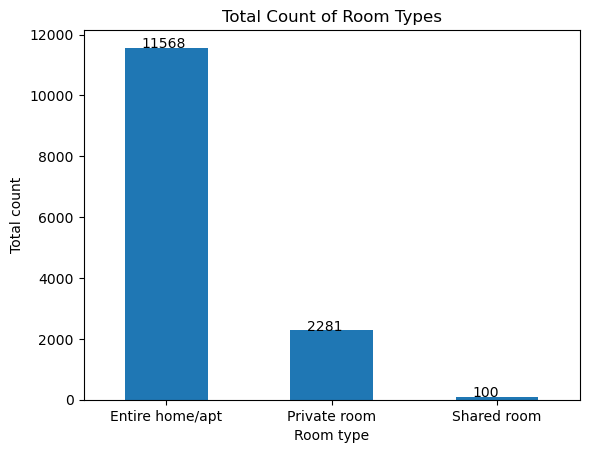

In [82]:
x = air.groupby('room_type').size().plot(kind='bar')
x.set(title='Total Count of Room Types', ylabel='Total count', xlabel='Room type')
x.set_xticklabels(x.get_xticklabels(), rotation=0)

for p in x.patches:
   x.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.2))

plt.show()

Examine the mean price of each room type.

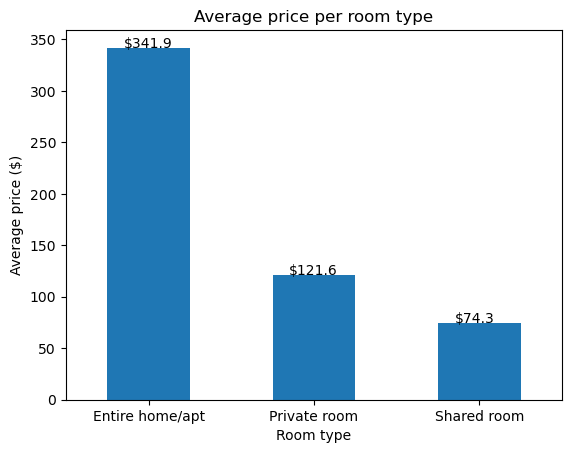

In [83]:
x = air.groupby('room_type')['price'].mean().plot(kind='bar')
x.set(title='Average price per room type', ylabel='Average price ($)', xlabel='Room type')
x.set_xticklabels(x.get_xticklabels(), rotation=0)

for p in x.patches:
   x.annotate('${:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.2))

plt.show()

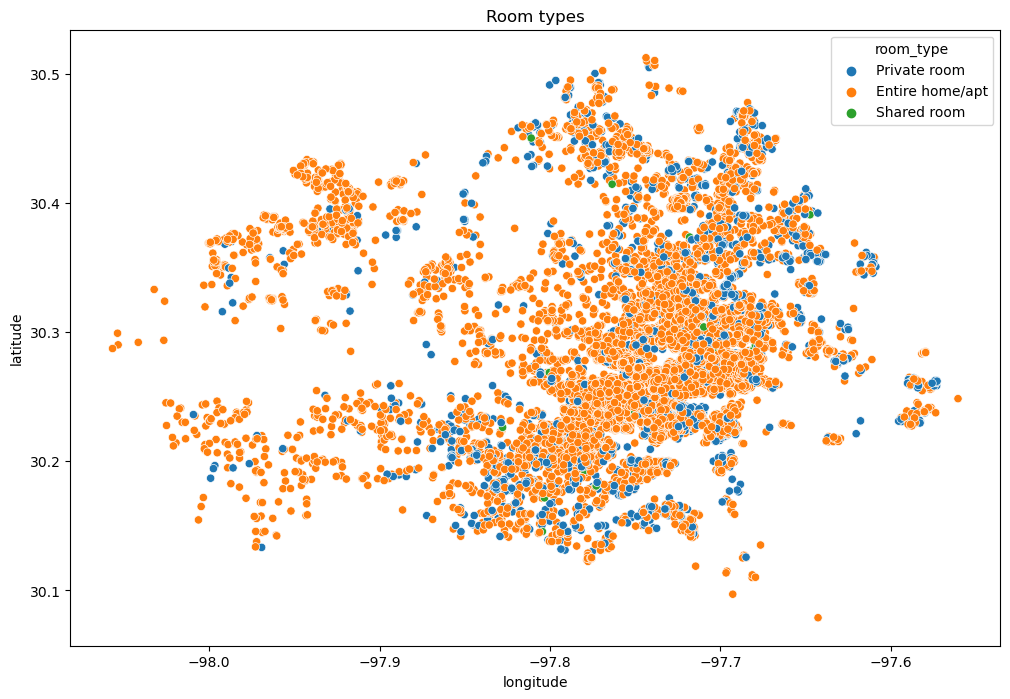

In [86]:
plt.figure(figsize=(12,8))
x = sns.scatterplot(x=air.longitude,y=air.latitude,hue=air.room_type)
x.set(title='Room types')
plt.show()

Time to find which area was expensive and which area had reasonable price.

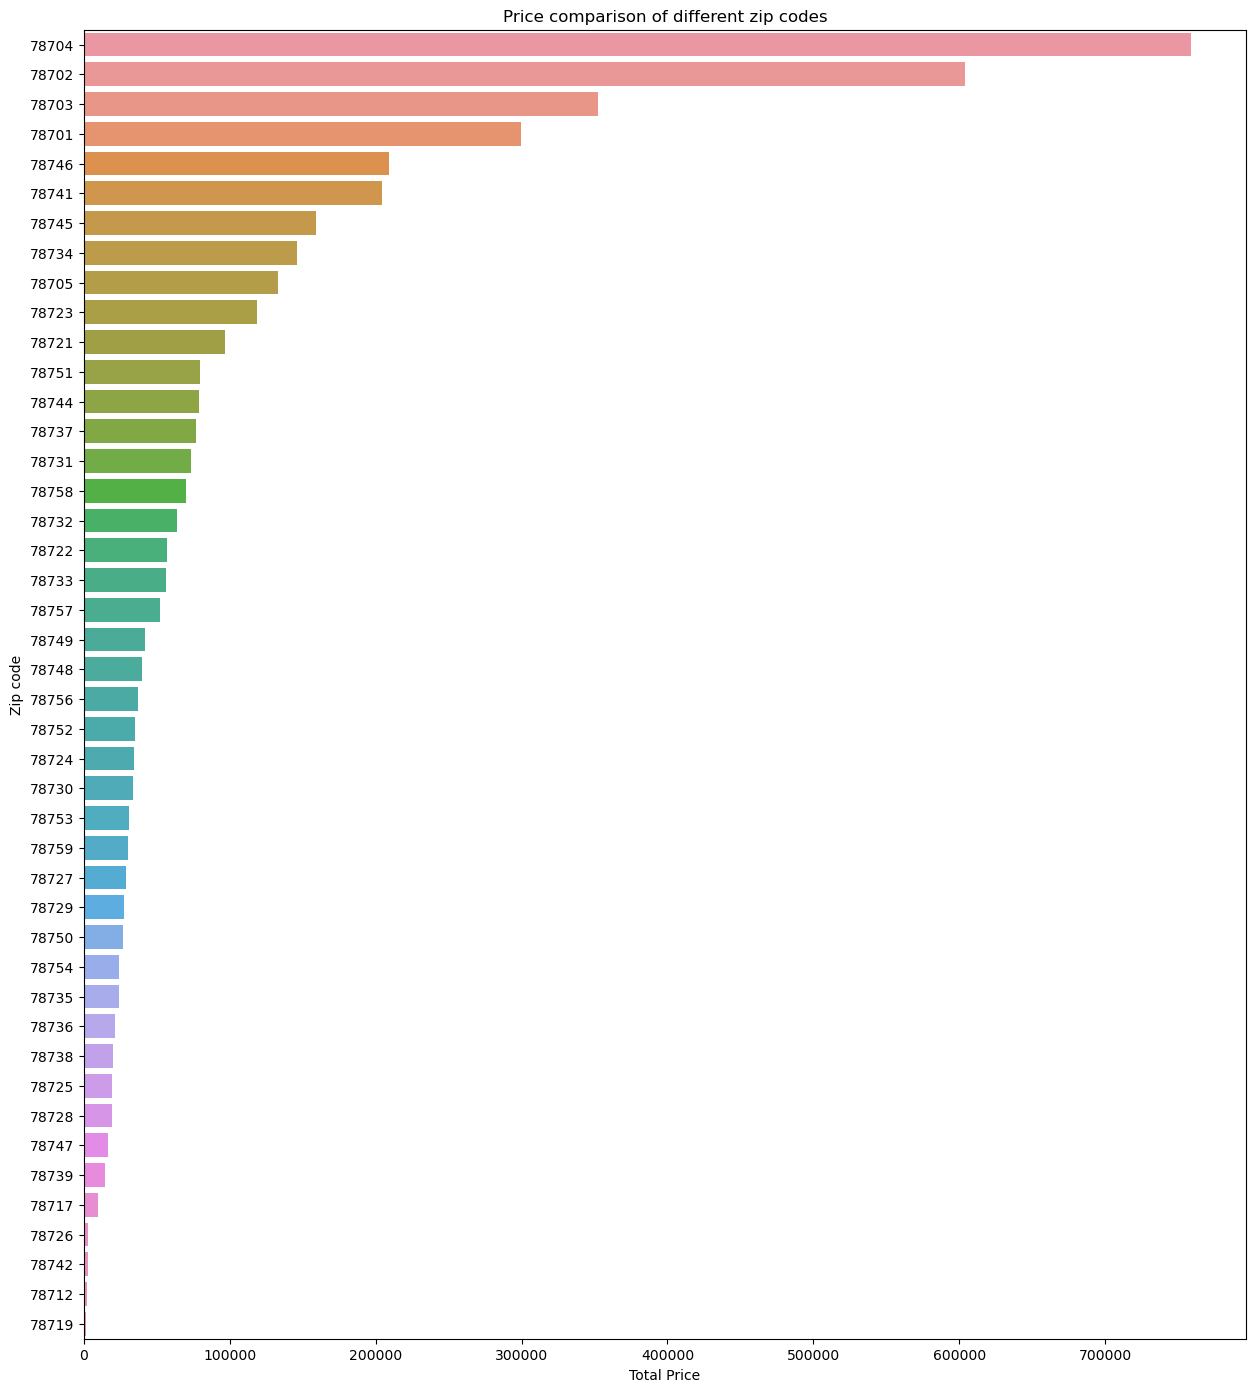

In [87]:
x= air.groupby(['zip_code']).agg({'zip_code':'count','price':'sum'}).sort_values(by='price',ascending=False)
plt.figure(figsize=(15,17))
_ = sns.barplot(y=x.index, x=x.price, orient='h', order=x.index)
_.set(title='Price comparison of different zip codes', ylabel='Zip code', xlabel='Total Price')

plt.show()

The most expensive place to rent was located at 78704.

**Let's look at the top 20 expensive places.**

In [88]:
expensive  = air.sort_values(by='price', ascending=False)
expensive

id    host_id  zip_code  host_neighborhood  \
11663  39723814  300189362     78703             Dawson   
10327  36868625  210733801     78733        Rollingwood   
8477   26059907  111566801     78735                  0   
4273    4538217   22773046     78723       Windsor Park   
11856  42091432  330222299     78702  East Cesar Chavez   
...         ...        ...       ...                ...   
9620   21946737  160198833     78731         Bull Creek   
1517   20713150    3864713     78703                  0   
4786   20647325   28367024     78757             Wooten   
10070  42664390  192261997     78725                  0   
1433   20674436    3594051     78704                  0   

                property_type        room_type  price  latitude  longitude  \
11663            Entire condo  Entire home/apt  65155  30.27485 -97.753310   
10327            Entire villa  Entire home/apt  10450  30.33617 -97.847720   
8477              Entire home  Entire home/apt  10000  30.23574 -97.813080   
4273              Entire home  Entire home/apt  10000  30.31706 -97.683100   
11856  Room in boutique hotel     Private room  10000  30.26065 -97.723150   
...                       ...              ...    ...       ...        ...   
9620     Private room in home     Private room     10  30.35868 -97.785360   
1517     Private room in home     Private room     10  30.30486 -97.754900   
4786     Private room in home     Private room     10  30.35627 -97.721330   
10070  Room in boutique hotel     Private room     10  30.22128 -97.620363   
1433              Entire home  Entire home/apt      1  30.23928 -97.742980   

       rating  availability_365  
11663    4.67               171  
10327    0.00               322  
8477     0.00               364  
4273     5.00                 0  
11856    0.00               365  
...       ...               ...  
9620     0.00                 0  
1517     0.00                 0  
4786     5.00                 0  
10070    5.00                 0  
1433     5.00                 0  

[13949 rows x 11 columns]

In [89]:
# Create the map
m_3 = folium.Map(location=[30.266666,-97.733330], tiles='openstreetmap', zoom_start=10)

# Add points to the map
for idx, row in expensive[:20].iterrows():
    Marker([row['latitude'], row['longitude']],
           icon=folium.Icon(icon="home")
          ).add_to(m_3)

style = {'fillColor': '#FFFFFF',
         'lineColor': '#00FFFFFF'}

loc = 'geojson/neighbourhoods_march16_2023.geojson'
folium.GeoJson(loc, name="geojson", style_function=lambda x: style).add_to(m_3)

# Display the map
m_3

In [ ]:
m_3.save("index.html")